In [1]:
'''

Quick tool to deal with METADISE GB scan results. The script takes a csv file as an input that is set out 
with displacements as the x and y grid and energies as the grid. 

  dx dx dx dx dx dx dx dx dx dx 
dy e  e  e  e  e  e  e  e  e  e 
dy e  e  e  e  e  e  e  e  e  e 
dy e  e  e  e  e  e  e  e  e  e 
dy e  e  e  e  e  e  e  e  e  e 
dy e  e  e  e  e  e  e  e  e  e
dy e  e  e  e  e  e  e  e  e  e


'''


import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np




def ReadGrid(File):
    results = []
    with open(File) as csvfile:
        Data = csv.reader(csvfile, delimiter=',', quotechar=',')
        for row in Data:
            results.append(row)
    Data = np.asarray(results)

    X = np.array([])
    Y = np.array([])
    grid = np.array([])

    for i in range(0, Data.size):
        if i == 0:
            X = np.append(X, Data[i])
        elif i != 0:
            temp = np.asarray(Data[i])
            Y = np.append(Y, temp[0])
            temp = np.delete(temp, 0)
            grid = np.append(grid, temp)

    X = np.insert(X, 0, 0)
    X = X.astype(float)
    Y = Y.astype(float)
    grid = grid.astype(float)
    grid = np.reshape(grid, (Y.size, X.size))
    
    return X, Y, grid
    
    
def GridPlot(X, Y, grid):
    X, Y = np.meshgrid(X, Y)
    plt.contourf(X, Y, grid, 25, cmap='jet', interpolation='nearest')
    plt.xlabel("Displacement in X (" r'$\AA$' ")", fontsize=18)
    plt.ylabel("Displacement in Y (" r'$\AA$' ")", fontsize=18)
    plt.tick_params(labelsize=14)
    plt.tight_layout()
    plt.colorbar()
    plt.show()
    plt.close()


In [2]:
X, Y, grid = ReadGrid("grid.csv")

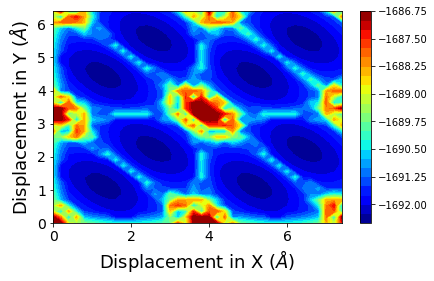

In [3]:
GridPlot(X, Y, grid)